In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [78]:
data = pd.read_csv('./data/full_data.csv', encoding='utf-16', sep='\t')
data.drop(columns=['Unnamed: 0'], inplace=True) #,'KLD热风风门开度（%）d.1'
num = int(len(data) * 0.5)

data = data.iloc[:num,:]

In [4]:
data.drop(columns=['除尘房除尘风机频率d','除尘房排潮风机频率(Hz)d','排潮风机电机频率d', 
           'ZC-35除尘风机运行频率d','PC-37排潮风机运行频率d'], inplace=True)
data['时间'] = data['时间'] / 10

In [67]:
data['KLD烘丝机管道风速差压传感器读数d'] = data['KLD烘丝机管道风速差压传感器读数d']-data['KLD烘丝机管道风速差压传感器读数d'][0]

In [68]:
data['KLD烘丝机管道风速差压传感器读数d'].head()

0    0.000000
1    0.002658
2   -0.034514
3    0.005201
4   -0.004407
Name: KLD烘丝机管道风速差压传感器读数d, dtype: float64

In [43]:
from sklearn.utils import shuffle
data = shuffle(data, n_samples=len(data))
data.shape

(20739, 35)

In [80]:
y = data['KLD热风风门开度（%）d']
x = data.drop(columns=['KLD热风风门开度（%）d'])
idx = x.columns.get_loc('KLD烘丝机管道风速差压传感器读数d')
idx

0

In [81]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x, y)

In [32]:
y.values.reshape((-1,1))
x.shape, y.shape

((20739, 34), (20739,))

In [82]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print(len(x_train))

16591


In [79]:
data = data.loc[:,['KLD烘丝机管道风速差压传感器读数d',
 'KLD热风进筒温度（℃）d',
 'KLD1区蒸汽薄膜阀开度（%）d',
 '烘丝筒1区筒壁温度设定',
 '制丝高压蒸汽DN200温度-薄板D',
 'KLD排潮风门开度反馈值PIC1-Y6（%）D',
 '筒体电机电流d',
 'PC-37排潮风机负压值d',
 'KLD除水量（l/h）d',
 '时间',
 'KLD烘后温度（℃）d',
 'ZC-36除尘风机负压值d',
 'KLD烘后水分（%）d',
 '排潮风机电机电流d',
 'KLD排潮风门开度（%）d',
 'KLD热风温度（℃）d',
 'KLD热风风门开度（%）d']]

In [16]:
data = data.loc[:,['时间',
  '1区冷凝水温度（℃）d',
  '1区蒸汽压力（bar）d',
  '1区筒壁温度（℃）d',
  '2区冷凝水温度（℃）d',
  '2区蒸汽压力（bar）d',
  '2区筒壁温度（℃）d',
  'KLD1区蒸汽薄膜阀开度（%）d',
  'KLD1区蒸汽薄膜阀开度反馈值TIC1-Y1（%）D',
  'KLD2区蒸汽薄膜阀开度（%）d',
  'KLD2区蒸汽薄膜阀开度反馈值TIC3-Y22（%）D',
  'KLD一次减压后蒸汽压力（bar）d',
  'KLD排潮温度（℃）d',
  'KLD排潮风门开度反馈值PIC1-Y6（%）D',
  'KLD烘丝机管道风速差压传感器读数d',
  'KLD烘后水分（%）d',
  'KLD烘后温度（℃）d',
  'KLD热风进筒温度（℃）d',
  'KLD热风风速（m/s）d',
  'PC-37排潮风机负压值d',
  '制丝A线烘丝段用蒸汽流量',
  '烘丝筒1区筒壁温度设定',
  '烘丝筒2区筒壁温度设定',
  '烘前叶丝累计量（kg）d',
  'KLD热风风门开度（%）d.1']]

In [47]:
from sklearn.svm import SVR

svr = SVR(C=1, gamma=0.007)
svr_rf = svr.fit(x_train, y_train)
svr_pre = svr_rf.predict(x_train)
svr_rf.score(x_test, y_test)

0.8577445374135644

In [48]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso_rf = lasso.fit(x_train, y_train)
lasso_pre = lasso_rf.predict(x_train)
lasso_rf.score(x_test, y_test)

0.7207284008091431

Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], 

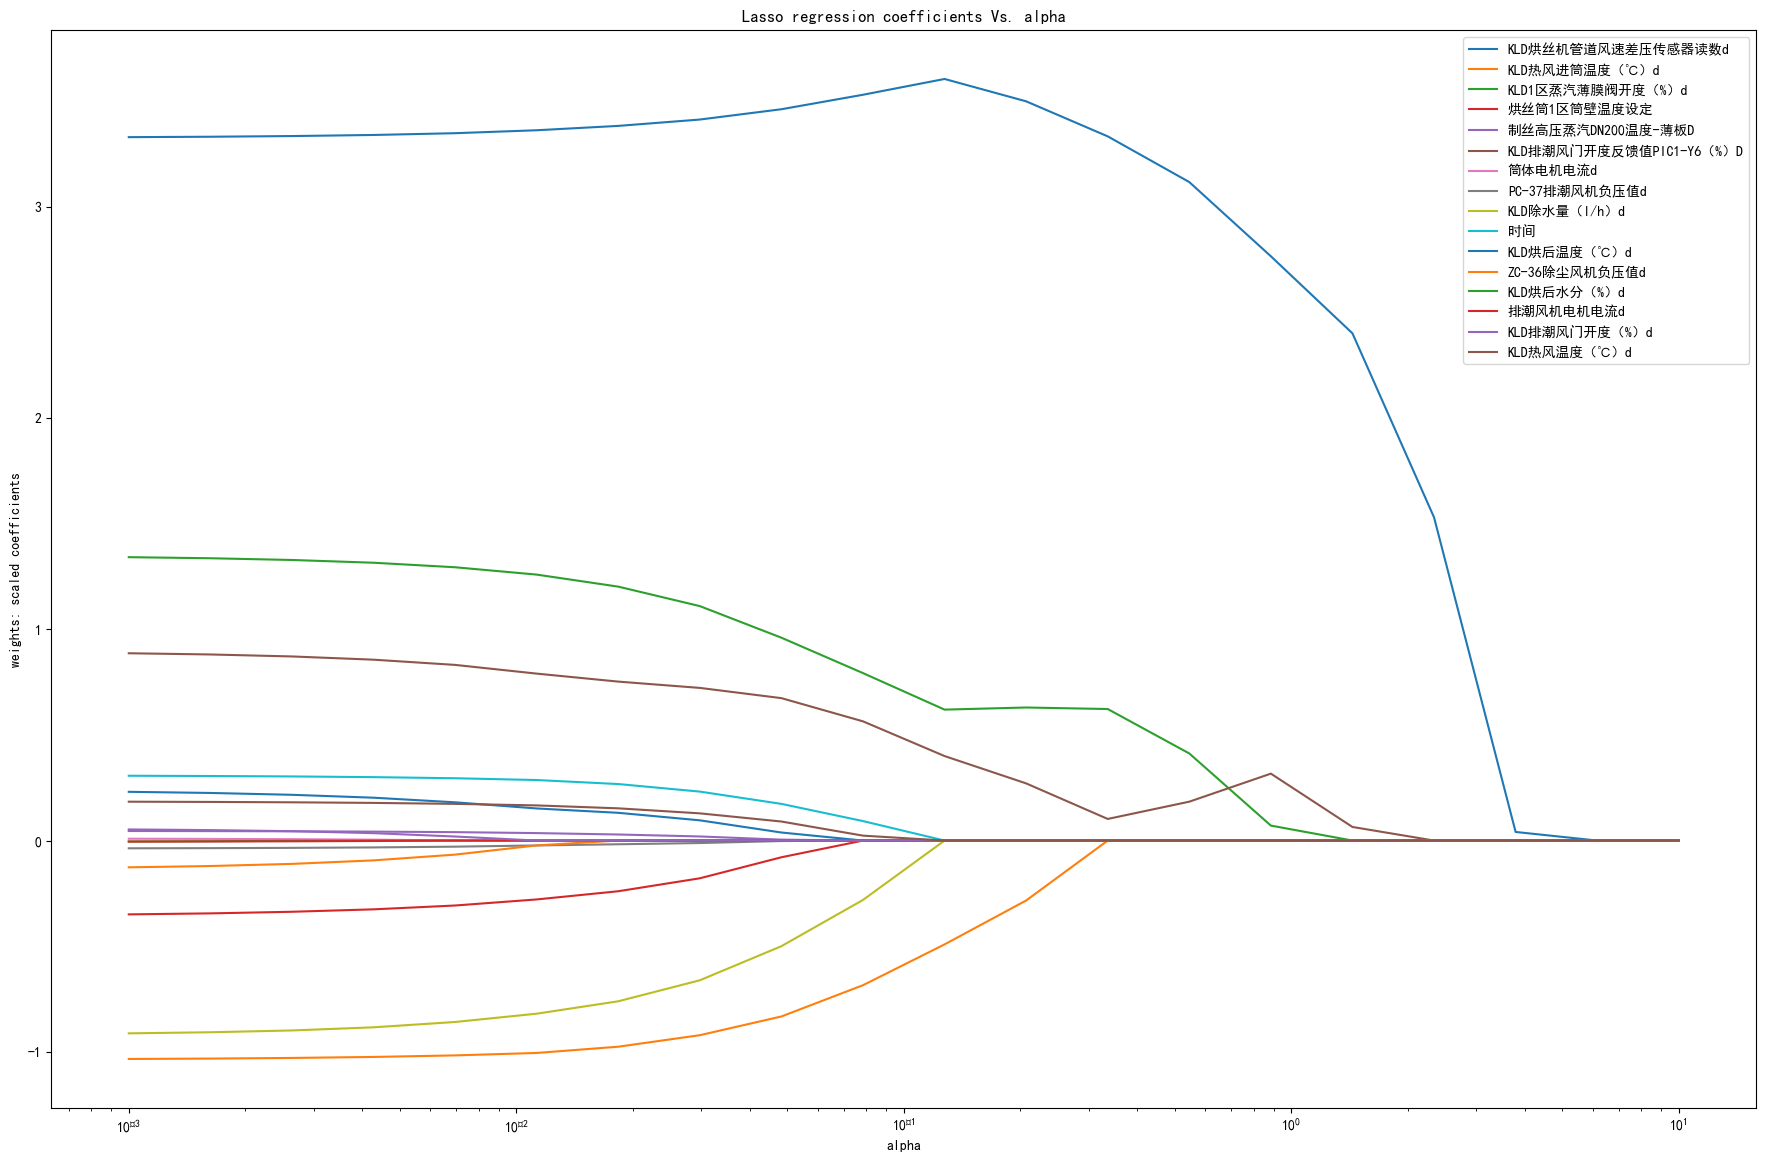

In [83]:
alpha_lasso = 10**np.linspace(-3,1,20)
# alpha_lasso = np.logspace(-10,-2,20,base=10)
# print(alpha_lasso)
lasso = Lasso()
coefs_lasso = []

for i in alpha_lasso:
    lasso.set_params(alpha = i)
    lasso.fit(x_train, y_train)
    coefs_lasso.append(lasso.coef_)

plt.figure(figsize=(22,14))
ax = plt.gca()
ax.plot(alpha_lasso, coefs_lasso)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights: scaled coefficients')
plt.title('Lasso regression coefficients Vs. alpha')
plt.legend(data.drop('KLD热风风门开度（%）d',axis=1, inplace=False).columns)
plt.show()

In [49]:
from sklearn.linear_model import LassoCV
lasso_ = LassoCV(alphas=alpha_lasso,cv=5).fit(x_train,y_train)
best_alpha = lasso_.alpha_
best_alpha

0.0026366508987303583

In [50]:
lasso_.coef_, lasso_.score(x_test,y_test)

(array([ 2.13121508e-01,  6.14723277e-03,  1.09571174e+00, -5.99063793e-01,
         7.76801200e-01,  0.00000000e+00,  3.29286665e+00, -1.94020922e-02,
         1.14102511e-01,  8.01835528e-02,  4.86965329e-02, -1.01866386e+00,
        -7.86791253e-01,  4.42762398e-02, -1.15374600e-02,  0.00000000e+00,
         0.00000000e+00, -1.06099137e-01,  3.82070789e-01,  8.46753364e-02,
        -7.06531194e-02, -1.53796722e-02, -7.69171762e-02, -1.99992795e-02,
         0.00000000e+00,  6.70328850e-03, -1.18035870e-01,  3.89341560e-02,
         3.39569744e-03, -0.00000000e+00, -1.61279130e-02,  1.69212956e-02,
         6.95826828e-04, -2.74951599e-02,  0.00000000e+00,  1.12155508e+00,
         0.00000000e+00, -2.30253448e-01,  1.13164476e-02]),
 0.8612717199025441)

In [51]:
np.random.shuffle(x_test[:, idx])
lasso_.score(x_test,y_test)

-0.20733568293560367

In [52]:
from sklearn.ensemble import RandomForestRegressor
rfg = RandomForestRegressor()
rfg_rf = rfg.fit(x_train, y_train) #.ravel()
rfg_pre = rfg_rf.predict(x_test)
acc = rfg_rf.score(x_test, y_test)

In [7]:
# pd.Series(rfg.feature_importances_, index = data.drop('KLD热风风门开度（%）d',axis=1).columns)

In [53]:
from sklearn.linear_model import RidgeCV
# 创建损失计算函数 SSE
def sse(resid):
    return np.sum(resid**2)

In [69]:
def plot_residuals_and_coeff(resid_train, resid_test, coeff):
    fig, axes = plt.subplots(1, 3, figsize=(12, 3))
    plt.ylim([-20,20])
    axes[0].bar(np.arange(len(resid_train)), resid_train)
    axes[0].set_xlabel("sample number")
    axes[0].set_ylabel("residual")
    axes[0].set_title("training data")
    axes[1].bar(np.arange(len(resid_test)), resid_test)
    axes[1].set_xlabel("sample number")
    axes[1].set_ylabel("residual")
    axes[1].set_title("testing data")
    plt.ylim([-2,4])
    axes[2].bar(np.arange(len(coeff)), coeff)
    axes[2].set_xlabel("coefficient number")
    axes[2].set_ylabel("coefficient")
    fig.tight_layout()
    return fig, axes
# fig, ax = plot_residuals_and_coeff(resid_train, resid_test, model.coef_)
# plt.show()

In [85]:
model = RidgeCV()
model.fit(x, y)
model.alpha_


10.0

train sse: 47352.22342570961 test sse: 8596.181139184722


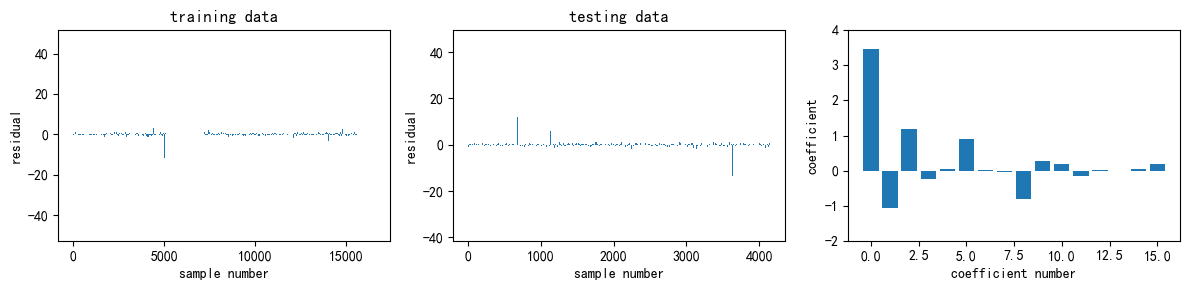

In [86]:
resid_train = y_train - model.predict(x_train)
sse_train = sse(resid_train)
resid_test = y_test - model.predict(x_test)
sse_test = sse(resid_test)
print('train sse:', sse_train, 'test sse:', sse_test)
fig, ax = plot_residuals_and_coeff(resid_train, resid_test, model.coef_)
plt.show()

best alpha: 10.0
train sse: 41359.52914099087 test sse: 11097.853712590557


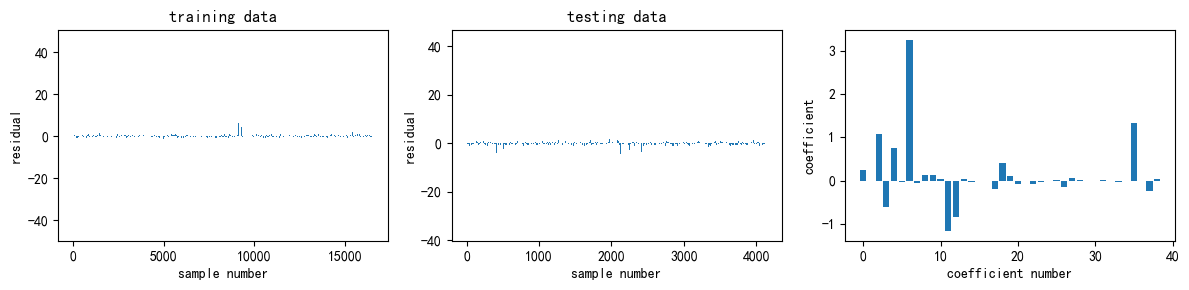

In [38]:
from sklearn.linear_model import ElasticNetCV
Ela = ElasticNetCV()
Ela.fit(x_train, y_train)
print('best alpha:', model.alpha_)
resid_train = y_train - model.predict(x_train)
sse_train = sse(resid_train)
resid_test = y_test - model.predict(x_test)
sse_test = sse(resid_test)
print('train sse:', sse_train, 'test sse:', sse_test)
fig, ax = plot_residuals_and_coeff(resid_train, resid_test, model.coef_)

In [13]:
from sklearn.decomposition import PCA

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

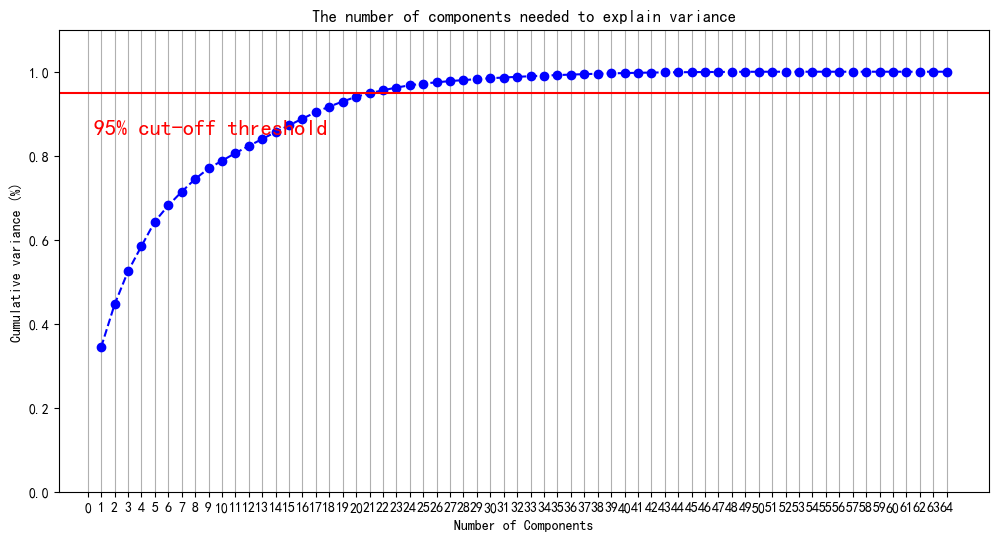

In [14]:
import matplotlib.pyplot as plt
x_range = len(x_train[0])+1
pca = PCA().fit(x_train)

%matplotlib inline
plt.rcParams["figure.figsize"] = (12, 6)

fig, ax = plt.subplots()
xi = np.arange(1, x_range, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0, 1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
# change from 0-based array index to 1-based human-readable label
plt.xticks(np.arange(0, x_range, step=1))
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color='red', fontsize=16)

ax.grid(axis='x')
plt.show()